<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/pytorch/blob/main/dl_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What you will learn in this notebook
 
1. Introduction to supervised learning and classification
1. Introduction to loss functions, activation functions, and gradient descent
1. Introduction to Pytorch packages, tensors, computation graphs, and gradients


### PyTorch Tensors
- A PyTorch ```tensor``` is an object that stores a multidimensional array
- A ```tensor``` according to [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html) is a multidimensional matrix containing elements of a single data type.
- In addition to the data, a tensor has a large number of attributes and functions
- A PyTorch tensor has a similar interface to numpy arrays

### PyTorch Tensors

In [3]:
import torch
# a 2-dim tensor created from a list of lists
b=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float32)
print("b={}".format(b))
print("b has dimensions {}".format(b.shape))
#torch.Size() is iterable so we can create a list or tuple
print("b has dimensions {}".format(tuple(b.shape)))


b=tensor([[1., 2., 3.],
        [4., 5., 6.]])
b has dimensions torch.Size([2, 3])
b has dimensions (2, 3)


### PyTorch Tensors

In [15]:

# A 0-dim tensor. Without dtype it will be implicitly an integer
a=torch.tensor(1,dtype=torch.float32)
print(a)
print(a.shape)
# use .item() to extract a scalar from a 0-d tensor
print("single value in a is {}".format(a.item()))

tensor(1.)
torch.Size([])
single value in a is 1.0


tensor([1.])

### Tensor slices
- Indexing and slices are similar to numpy


In [16]:
print(b)
print(tuple(b.size()))
#print row index 0
print(b[0,:])
#print column index 1
print(b[:,1])

tensor([[1., 2., 3.],
        [4., 5., 6.]])
(2, 3)
tensor([1., 2., 3.])
tensor([2., 5.])


### From/to numpy 

In [19]:
import numpy as np
a=np.array([[1,2,3],[4,5,6]],dtype=np.float32)
b=torch.from_numpy(a)
print("b={}".format(b))
print("b has {} as data type".format(b.dtype))
print("convert b to numpy array")
print(b.numpy())

b=tensor([[1., 2., 3.],
        [4., 5., 6.]])
b has torch.float32 as data type
convert b to numpy array
[[1. 2. 3.]
 [4. 5. 6.]]


### Useful PyTorch operations

In [1]:
# Create a tensor of shape (2,3) whose values are all zeros 
a=torch.zeros([2,3])
print(a)
# Same as above but filled with ones
a=torch.ones([3,2])
print(a)
# Same as above but filled with random values from a uniform distribution over [0,1] 
# https://pytorch.org/docs/stable/generated/torch.rand.html
a=torch.rand([2,3])
# See also randn for a normal distribution
#https://pytorch.org/docs/stable/generated/torch.randn.html

print(a)


NameError: name 'torch' is not defined

### Useful PyTorch operations

In [7]:
# A tensor filled with ones that has the same dimensions as tensor a
b=torch.ones_like(a)
print(b)

# Transpose a tensor
a=torch.tensor([[1,2,3],[4,5,6]])
print("a=")
print(a)
print("transpose of a=")
print(a.transpose(0,1))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
a=
tensor([[1, 2, 3],
        [4, 5, 6]])
transpose of a=
tensor([[1, 4],
        [2, 5],
        [3, 6]])


### squeeze/unsqueeze/stack
- In some situations one might need to add/remove dimensions from a tensor
- This can only be done if added/removed dimensionality size is one
- For example, a tensor of shape (1,3,3) or (2,1,2)
- Can be converted to (3,3) and (2,2)
- and vice-versa


In [28]:
a=torch.tensor([[1,2,3],[4.,5.,6.]])
print("a's original shape",tuple(a.size()))
print("a's shape after unsqueeze",tuple(a.unsqueeze(0).size()))
print("a's shape after unsqueezing a different dimension",tuple(a.unsqueeze(1).size()))
a.reshape(6)

a's original shape (2, 3)
a's shape after squeeze (1, 2, 3)
a's shape after squeezing a different dimension (2, 1, 3)


tensor([1., 2., 3., 4., 5., 6.])

In [31]:
a=torch.tensor([1.,2,3])
b=torch.tensor([4,5.,6])
c=torch.stack([a,b])
print(c)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


AttributeError: 'Tensor' object has no attribute 'reshape_'

### In-place tensor operations

- Given a tensor A
- Some operations on A create a copy of A
- Some operations (in-place) modify the tensor A itself. Usually have a "_" suffix

In [10]:
a=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float32)
a.unsqueeze(0).shape

torch.Size([1, 2, 3])

In [11]:
print(a.size())

torch.Size([2, 3])


In [13]:
a.unsqueeze_(0)
print(a.size())

torch.Size([1, 1, 2, 3])


### More about in-place operations
- In addition to methods with an underscore suffix the following are also in-place
- +=,-=,*=,/=,
- using an index or slice, e.g. x[0]=2

In [18]:
x=torch.tensor([1.,2])
y=torch.tensor([3.,4])
print(id(x))
x=x+y # a new tensor is allocated
print(id(x))
x+=y # this is an in-place operation
print(id(x))

140368111034640
140371479780608
140371479780608
140371479780608
tensor([ 9., 10.])


In [19]:
x=torch.tensor([1.,2])
y=torch.tensor([3.,4])
x=x+y # a new tensor is allocated
x+=y # this is an in-place operation
print(id(x))
x[0]=9
print(id(x))
print(x)

140368111034720
140368111034720
tensor([ 9., 10.])


### autograd package

### Do linear regression using PyTorch

## CIFAR10 Dataset

- We will use some of PyTorch capabilities to perform a classification problem using logistic regression
- CIFAR10 is a set of 60000 images (50000 for training and 10000 for testing)
- The images are of 10 different classes: 
- airplanes,cars,birds,cats,deers,dogs,frogs,horses,ships,trucks
- CIFAR10 can be accessed using the ```torchvision``` package. 

In [8]:
import torchvision as vision
cifar10_train=vision.datasets.CIFAR10(".",download=True,train=True)# train=True is the default
cifar10_test=vision.datasets.CIFAR10(".",download=True,train=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


It helps to get an idea of the properties of the dataset and how to use torch datasets

In [9]:
train_samples=len(cifar10_train)
test_samples=len(cifar10_test)
print("The length of training data is {} and the test data is {}".format(train_samples,test_samples))


The length of training data is 50000 and the test data is 10000


Because datasets are **iterable** objects (see explanation [here](https://docs.python.org/3/glossary.html) ) the best way to explore the items is through an iterator.

In [10]:
# create an iterator to the dataset
itr=iter(cifar10_train)
img0,label0=next(itr)
print(type(img0))

<class 'PIL.Image.Image'>


### Visualizing the images

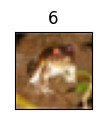

In [11]:
# Plot the first image (a frog) and set the corresponding label as title

import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_size_inches(1,1)
p=fig.add_subplot()

p.set_title(str(label0))
p.axes.get_xaxis().set_visible(False)
p.axes.get_yaxis().set_visible(False)
plt.imshow(img0)

- In this notebook we will use a "low level" way of accessing the data items. 
- cifar10_train.data is an array of images so cifar10_train.data[0] is the first image
- cifar10_train.targets is an array of the corresponding labels so cifar10_train.targets[0] is the first label.

- Next we create torch **tensors** from the datasets. 


- For now, we think of a torch **tensor** as a multidimensional array.
- **Note**: the pixel values are divided by the maximal value (255). 
- This is often the case to aid with the convergence

In [12]:
img_train=torch.tensor(cifar10_train.data,dtype=torch.float32)/255.
img_test=torch.tensor(cifar10_test.data,dtype=torch.float32)/255.
label_train=torch.tensor(cifar10_train.targets,dtype=torch.float32)
label_test=torch.tensor(cifar10_test.targets,dtype=torch.float32)

### Binary classification

- We simplify the classification problem by reducing the original 10 classes into 2
- All "living" things: birds,cats,deers,dogs,frogs,horses into one class
- The remaining objects into another class

In [13]:
#airplane=0,car=1,bird=2,cat=3,deer=4,dog=5,frog=6,horse=7,ship=8,truck=9
features=torch.tensor([0,1,8,9])
for i in range(label_train.shape[0]):
    if torch.isin(label_train[i],features):
        label_train[i]=1
    else:
        label_train[i]=0

for i in range(label_test.shape[0]):
    if torch.isin(label_test[i],features):
        label_test[i]=1
    else:
        label_test[i]=0        

In [ ]:
# the dataset is a bit biased
torch.count_nonzero(label_train)



## Logistic Regression

- The simplest model for binary classification is Logistic Regression
- It can be regarded as the **simplest neural network**, a single "neuron". 
- The input to the network is a vector $x$ of size $n$ 
- and it feeds a single unit (a neuron or perceptron). 
- To obtain the output we perform the **dot** product between the matrix of learnable weights $W$ and the input $x$
- A bias $b$ is added to the result before
- It is fed into some function (usually nonlinear) $f$

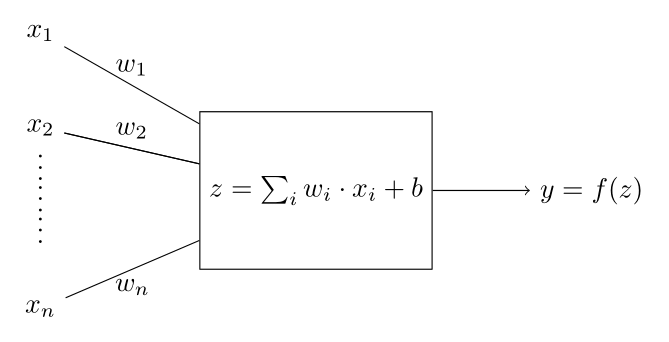

- To distinguish between the "true" labels and the ouput of the network
    - We label the output by $\hat{y}$
- Then the relationship between input $x$ and output $\hat{y}$ is given by
$$
\begin{align*}
z&=\sum_iw_i\cdot x_i+b\\
\hat{y}(x)&=f(z)
\end{align*}
$$


- The input and _f_ are **known** whereas _W_ and _b_ are parameters to be determined. 
- Our goal is to find the _optimal_ _W_ and _b_ such that the output is as *close as possible* to the label associated with the input.
- How is **as close as possible** defined? 
- The dataset is usually a set of pairs $(x,y)$. We define the loss as the **deviation** between the label $y$ and the result $\hat{y}=f(z)$

$$loss=\mathcal{L}_{w,b}(y,\hat{y})$$

- The function $\mathcal{L}$ depends on depends on the parameters $w,b$. 
- Our goal is to find the **optimal** $w,b$ such that the loss is minimal. 

### Sigmoid

- So far we have not specified the function _f_ that our  model depends on $\hat{y}=f(z)$. 
- A commonly used function for binary classification isthe **sigmoid** function. 
$$
\begin{align*}
\sigma=\frac{1}{1+e^{-z}}
\end{align*}
$$




- The range of $\sigma$ go from 0 to 1 which we interpret as a probability. 

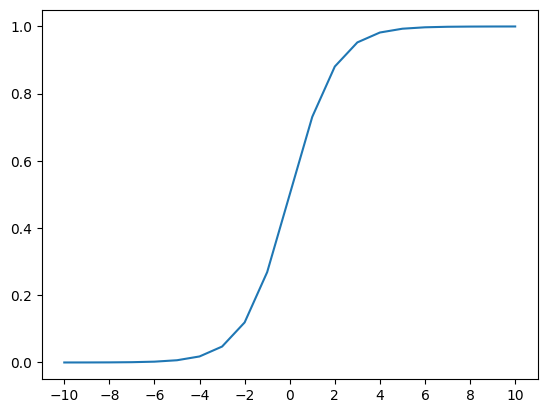

In [16]:
import numpy as np
z=[1/(1+np.exp(-x)) for x in range(-10,11)]
plt.plot([x for x in range(-10,11)],z)
plt.xticks([t for t in range(-10,11,2)])
plt.show()

### Loss function

- For binary classificaton the loss function is the **binary cross entropy**
- Given $y$ and $\hat{y}$ as the "true" and output labels the BCE is given by
$$
\mathcal{L}=-\frac{1}{n}\sum_{i=1}^n y\log(\hat{y})+(1-y)\log(1-\hat{y})
$$
- Note that since $\hat{y}$ depends on $w$ and $b$ so does $\mathcal{L}$

### Flatening the images

- The CIFAR10 images have dimensions (3,32,32) (3 channels, 32 height,32 width). 
- To use them as inputs to the network we need to create a vector of dimension 3x32x32
- i.e. flatten them

In [14]:
dim=3*32*32
train_samples=50000
test_samples=10000
img_train=img_train.reshape(train_samples,dim)
img_test=img_test.reshape(test_samples,dim)
print(img_train.shape)

torch.Size([50000, 3072])


### Computing the gradient

- When using PyTorch, a explicit form for the gradient is not necessary. - PyTorch can compute the gradient of any loss function with respect to the parameters using the ```autograd.grad``` function ([docs](https://pytorch.org/docs/stable/generated/torch.autograd.grad.html)).

- Also, the tensors with respect to which we need to compute the gradient (parameters), should have```requires_grad=True```


## Example

In [ ]:
# some simple example for autograd

### Initializing the parameters
- Our goal is to find the **optimal** values for the parameters: weights and bias. 
- Intially we give them random values (for weights) and 0 for the bias as shown below. 
- Note two things
1. We divide the initial values of the weights by the total number of samples to minimize the possibility of divergence.
1. The `reguires_grad` declares a tensor to be a variable, i.e. we need the derivative. 
1. In previous versions of Pytorch one needed to declare variables explicitly but this is deprecated now. See [here](https://pytorch.org/docs/stable/autograd.html#variable-deprecated)

In [ ]:
weights=torch.rand(dim,requires_grad=True,dtype=torch.float32)
weights.data/=train_samples
bias=torch.tensor(0.,requires_grad=True,dtype=torch.float32)

### Optimization loop

In [ ]:
# learning rate
rate=0.015
# for 0-1 classification we use the binary cross entropy loss
loss_fn=torch.nn.BCELoss()

for i in range(1000):
  y_hat=torch.matmul(img_train,weights)+bias
  y_hat=torch.sigmoid(y_hat)
  loss=loss_fn(y_hat.squeeze(),label_train)
 # compute the gradient wrt weights and bias
  dw,db=torch.autograd.grad(loss,[weights,bias])
  #update the weights and bias
  weights.data-=rate*dw
  bias.data-=rate*db

  if(i%100==0):
    print("loss {:.4f}".format(loss.item()))

## Prediction on the test data

- An important measure of any ML method is how well it "generalizes". 
- This is done by using the trained model on test data, i.e. other than the data it was trained on. 
- To do that we note that the output of our model is the probability that the input is a "machine", which could be any value between 0 and 1.
- The test labels are discrete values of 0 and 1 so how do we compare them? 
- We regard a probability $\ge 0.5$ to be 1 and $< 0.5$ to be 0

In [ ]:
def predict(X):
    # m is the number of samples
    m = X.size()[0]
    # initialize the prediction variable
    label_prediction = torch.zeros(m,1)
    
    # Compute vector "y_hat" predicting
    # the probabilities of a machine being present in the picture
    
    y_hat=torch.matmul(X,weights)+bias
    y_hat=torch.sigmoid(y_hat)
    # loop over all samples
    for i in range(y_hat.size()[0]):    
        # Convert probabilities y_hat[0,i] to actual predictions 
        #if y_hat[i]>=0.5:
        if y_hat[i]>=0.5:
            label_prediction[i]=1
        else:
            label_prediction[i]=0
    

    return label_prediction

In [ ]:
label_prediction_test = predict(img_test).squeeze()
label_prediction_train = predict(img_train).squeeze()
print("train accuracy:"+str((100 - torch.mean(torch.abs(label_prediction_train - label_train)) * 100)))
print("test accuracy:"+str((100 - torch.mean(torch.abs(label_prediction_test - label_test)) * 100)))

## Using Pytorch

- The model used in this notebook is simple enough to code directly. 
- We only needed Pytorch to compute the gradients. 
- When more complicated models are used this process becomes unwieldy.
- We can use Pytorch to abstract away the details.  


### The model

- Models in PyTorch **inherit** from ```torch.nn.Module```
- All we need to do is **override** two methods:

1. ```__init__```. As you would have guess this is called when the object is constructed to initialize our model
1. ``` forward```. This is called everytime a forward computation is needed

In [ ]:

import torch.nn as nn

class Net(nn.Module):
  def __init__(self,in_features,out_features):
    super(Net, self).__init__()
    self.input_size=in_features
    self.output_size=out_features
    # declaring weights and bias as parameters so that they are included
    # in the return value of .parameters()
    self.weights=nn.Parameter(torch.rand(in_features,requires_grad=True,dtype=torch.float32))
    self.weights.data/=in_features
    self.bias=nn.Parameter(torch.tensor(0.,requires_grad=True,dtype=torch.float32))
    #self.layer=nn.Linear(self.input_size,self.output_size,bias=True)
  def forward(self,input):  
    y_hat=torch.matmul(input,self.weights)+self.bias
    y_hat=torch.sigmoid(y_hat)
    return y_hat

- Note that in the initialization, the weights and bias are constructed as ```Parameter```. 
- This is so that we can use the ```.parameters()``` call and pass it to the optimizer.
- Next we create an instance of the model

In [ ]:
model=Net(dim,1)

Recall that each learning iteration performs a number of steps. 
1. Compute the forward pass over the input to get the output. 
    - This is now done using ```model.forward()``` indirectly by calling ```model(input)```
1. Compute the loss using an appropriate loss function. 
1. Compute the gradients. 
  

- Now we use ```loss.backward()```. 
   - Not only it computes the gradients but saves those values in the parameters themselves. 
   - For example, if ```p``` is a parameters then ```loss.backward()```  computes the gradient and saves it in ```p.grad```
- Update the parameters. 
   - This is done by the optimizer using ```optimizer.step()```. 
   - This is important since later on we will use optimizers that use a different strategy to update the parameters.

In [ ]:
rate=0.015

import torch.optim as optim
optimizer=optim.SGD(model.parameters(),lr=rate)
loss_fn=torch.nn.BCELoss()

for i in range(1000):
  # uses the .forward() method to get y_hat
  y_hat=model(img_train)
  # as before
  loss=loss_fn(y_hat.squeeze(),label_train)
  # Computes the gradients and saves them in the appropriate .grad
  loss.backward()
  # updates the parameters using the computed .grad
  optimizer.step()
  # zero the .grad values so that they don't accumulate
  optimizer.zero_grad()
  if(i%100==0):
    print("loss {:.4f}".format(loss.item()))